Arboles de decision
Eduardo Andres Enciso Gomez
Analisis de Datos
curso:202016908_84
UNAD

In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Leemos el archivo csv y lo cargamos como un dataset de Pandas. Y vemos su tamaño

In [3]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("C:/Users/root/Downloads/analisis de dato/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Se realiza el carga del archivo de winwquality 

In [5]:
data.shape

(1599, 12)

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Este resumen estadístico proporciona información sobre la distribución de cada variable en el dataset de vinos tintos. Vamos a desglosarlo y extraer conclusiones clave.
Número de registros: 1599 datos en cada variable (sin valores nulos).
 Medidas clave: Media (mean), Desviación estándar (std), Mínimos y Máximos (min, max), Cuartiles (25%, 50%, 75%).
 Objetivo posible: Relacionar las variables con la calidad del vino (quality).

In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

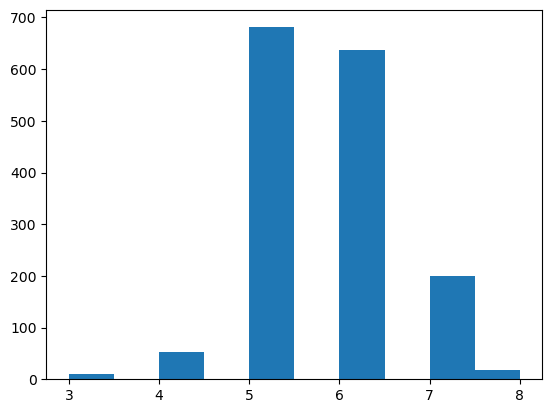

In [11]:
plt.hist(data.quality)

In [ ]:
Se observa que en el instograma de calidad que tenga valores entre 3 y 8 con picos en 5 y 6 indica que la mayoría de los datos tienen una calidad media o buena. Sin embargo, la presencia de valores en los extremos (3, 4 y 8) sugiere que algunos registros tienen problemas de calidad o, por el contrario, son de excelente calidad.

<Axes: xlabel='volatile acidity', ylabel='pH'>

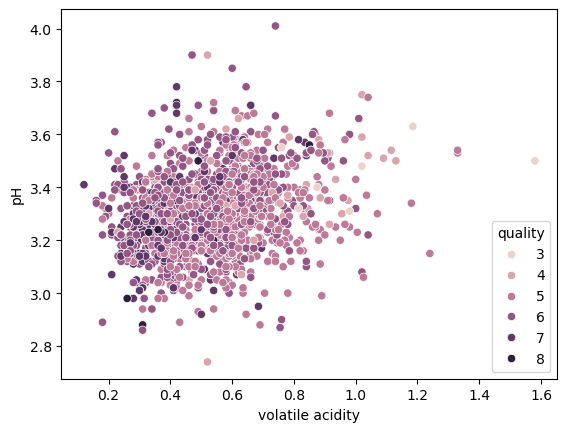

In [73]:
sns.scatterplot(x = "volatile acidity", y = "pH", hue = "quality", data = data)

validamos que el ph de color morado oscuro  llega a 4.0  de largo  y de ancho 0.8 en cuanto a volatile de acidity   es ancho 1.6 y de largo 3.5

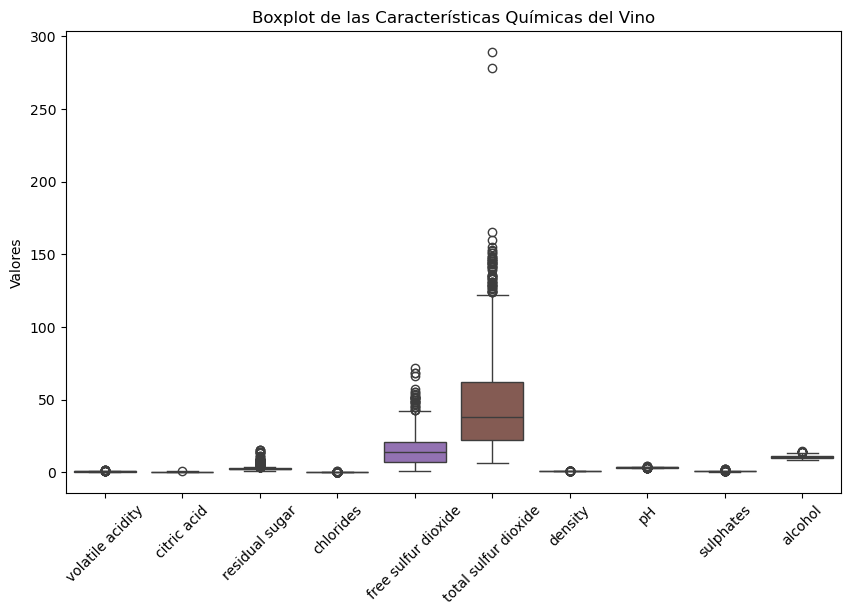

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['volatile acidity', 'citric acid', 'residual sugar', 
                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                       'density', 'pH', 'sulphates', 'alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot de las Características Químicas del Vino')
plt.ylabel('Valores')
plt.show()

Conocemos los boxplox en cuanto las caracteristicas de quimicas de vino volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol

In [60]:
predictors_col = ["volatile acidity", "citric acid", "residual sugar", "chlorides", 
                  "free sulfur dioxide", "total sulfur dioxide", "density", "pH", 
                  "sulphates", "alcohol"]
target_col = ["quality"]

In [61]:
predictors = data[predictors_col]
target = data[target_col]

In [62]:
predictors

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


El dataset contiene 1,599 registros con 10 variables que describen las características químicas del vino, junto con la variable quality (calidad del vino).
 Distribución de la Calidad del Vino
La mayoría de los vinos tienen una calidad entre 5 y 6, lo que indica que la base de datos está dominada por vinos de calidad promedio.

Pocas muestras pertenecen a calidades extremas (3 o 8), lo que puede afectar el rendimiento del modelo al predecir estas categorías.

Características Químicas del Vino
Acidez volátil y ácido cítrico: Varían entre muestras y pueden influir en la percepción del sabor.

Azúcar residual: Determina el dulzor del vino y presenta valores entre 1.9 y 3.6 en la muestra observada.

Dióxido de azufre (SO₂ libre y total): Niveles variables, influyen en la conservación del vino.

Densidad y pH: Propiedades físico-químicas clave en la composición del vino.

Sulfatos y alcohol: Pueden afectar el cuerpo y la percepción de calidad.

In [64]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


representa la calidad del vino en una escala numérica. Observando los datos, se pueden identificar algunos patrones:

Predominio de calidades 5 y 6

La mayoría de los registros tienen valores de 5 y 6, lo que sugiere que la base de datos está centrada en vinos de calidad media.

Esto podría influir en el desempeño del modelo, ya que las clases mayoritarias pueden tener mayor precisión mientras que las minoritarias podrían ser mal clasificadas.

 Posible desequilibrio en los datos

Si hay pocas muestras de calidades extremas (por ejemplo, vinos con calidad 3 u 8), el modelo podría tener problemas para predecirlas correctamente.

In [66]:
corr = predictors.corr()
corr

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
volatile acidity,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000


Correlaciones fuertes y negativas:

Ácido cítrico vs. acidez volátil (-0.55): A mayor cantidad de ácido cítrico, menor es la acidez volátil. Esto tiene sentido porque el ácido cítrico es un acidulante que puede equilibrar la percepción de acidez.

pH vs. densidad (-0.34): A medida que la densidad aumenta, el pH tiende a disminuir. Esto indica que vinos con mayor contenido de azúcares y otros compuestos solubles suelen ser más ácidos.

Alcohol vs. densidad (-0.50): A mayor contenido de alcohol, menor es la densidad. Esto es consistente con la química del vino, ya que el alcohol tiene menor densidad que el agua.

Correlaciones fuertes y positivas:

Dióxido de azufre libre vs. total (0.67): Como era de esperar, hay una alta relación entre ambas formas de dióxido de azufre, ya que el total incluye la fracción libre.

Cloruros vs. sulfatos (0.37): Sugiere que estos compuestos pueden estar relacionados en la composición química del vino, posiblemente debido a la procedencia del agua o el proceso de fermentación.

Relaciones moderadas:

Ácido cítrico vs. densidad (0.36): Sugiere que vinos con más ácido cítrico pueden ser más densos.

Ácido cítrico vs. sulfatos (0.31): Posiblemente porque ambos se usan en la estabilización y conservación del vino.

pH vs. ácido cítrico (-0.54): Cuanto más ácido cítrico tiene un vino, más bajo es su pH (es decir, es más ácido).

Correlaciones débiles:

Azúcar residual vs. alcohol (0.04): Indica que el nivel de azúcar residual no tiene un impacto significativo en el contenido de alcohol.

Dióxido de azufre total vs. alcohol (-0.21): No es una relación fuerte, pero sugiere que los vinos con más alcohol tienden a necesitar menos dióxido de azufre.

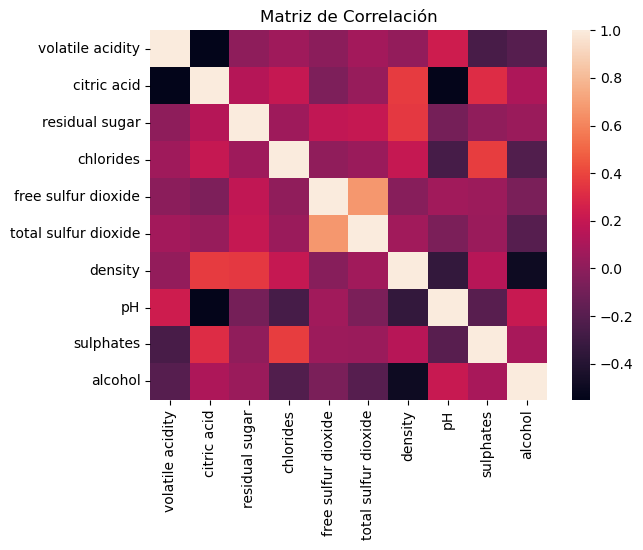

In [27]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

El mapa de calor de correlaciones nos indica cómo cada variable se relaciona con las demás. Por ejemplo, hay una correlación positiva moderada entre 'alcohol' y 'Volatile acidity', y una correlación negativa entre 'residual sugar' y 'suphates', sugiriendo que a mayor acidez volátil podría haber una calidad más baja.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [31]:
tree = DecisionTreeClassifier()

In [33]:
arbol = tree.fit(X_train, y_train)

[Text(0.5308421955059778, 0.9772727272727273, 'x[9] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.24994329099060633, 0.9318181818181818, 'x[8] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.39039274324829204, 0.9545454545454546, 'True  '),
 Text(0.04157771135781384, 0.8863636363636364, 'x[0] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.013663535439795047, 0.8409090909090909, 'x[3] <= 0.082\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.010247651579846286, 0.7954545454545454, 'x[3] <= 0.059\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.006831767719897523, 0.75, 'x[3] <= 0.051\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.0034158838599487617, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.010247651579846286, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 

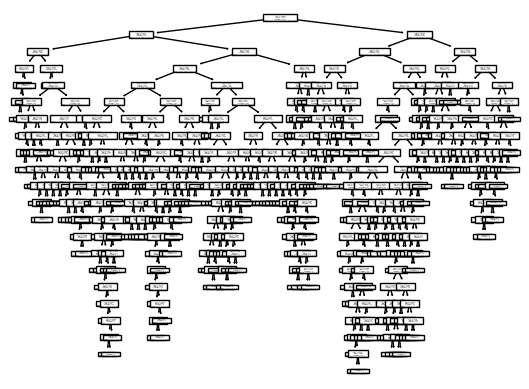

In [35]:
plot_tree(arbol)

Identificar cuantos elementos hay y  que la probabilidad llegue a 0 en division  en el arbol decision

In [37]:
predicciones = arbol.predict(X_test)

In [39]:
predicciones

array([7, 7, 5, 5, 6, 5, 5, 8, 4, 7, 5, 6, 5, 6, 7, 7, 6, 7, 5, 6, 5, 6,
       7, 5, 6, 5, 5, 7, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7, 5, 5, 6, 6,
       4, 5, 6, 8, 5, 6, 6, 4, 6, 5, 7, 5, 5, 6, 7, 5, 6, 7, 5, 5, 7, 7,
       6, 7, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5,
       7, 5, 6, 6, 4, 6, 5, 6, 5, 5, 6, 6, 7, 7, 6, 5, 6, 6, 3, 6, 5, 7,
       7, 7, 6, 6, 5, 5, 5, 7, 5, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 7, 6, 5, 3, 5, 6, 4, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 7, 6, 4, 6, 5, 6, 4, 6, 5, 5, 5, 5, 5, 7, 6,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 8, 5, 6, 6, 7, 5, 5, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 5, 6, 4, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 5, 5, 6, 4, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 4, 7, 7, 5,
       6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 4, 6, 6, 5, 5, 5, 4, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 5, 6, 5, 5, 5, 5, 7,

Nos muestra las predicciones

In [41]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,0,4,1,2,1,0
5,2,3,101,32,8,0
6,0,7,32,70,13,2
7,0,0,5,8,21,1
8,0,0,1,3,2,0


se hacen una comparacion de los datos de prediccion con los datos reales La diagonal principal (valores correctos) tiene los números más altos, lo que indica que el modelo acierta en muchas predicciones. Predicción más precisa en la clase 5:

El modelo tiene su mejor desempeño en los vinos con calidad 5, con 101 aciertos.

Sin embargo, hay 32 casos mal clasificados como 6, lo que sugiere que el modelo confunde vinos de calidad 5 y 6.

 Dificultad con calidades extremas (3 y 8):

Para calidad 3 → 1 vino fue clasificado como 5 (error total en esta clase).

Para calidad 8 → Solo 1 caso fue clasificado correctamente.

Errores frecuentes en vinos de calidad media (5-6-7):

El modelo tiende a confundir vinos con calidad 5 y 6, lo que indica que sus características pueden ser muy similares.

También hay errores entre calidad 6 y 7.

In [43]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6125

El accuracy nos permite validar los valores con reales  con las predicciones  este modelo es de 0.61 lo ideal es que sea 1  de lo cual tenemos un  61%

In [45]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.62087146491344

Tenemos un precision de los verdaderos sobre el total de los positivos predichos en positivo que es de 0.62

In [47]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.6125

Los verdaredos positivos de los positivos reales que es 0.61

In [49]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6146239251694448

In [ ]:
ealiza la combinacion de la precision y recall  de 0.61